# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
! pip install scikit-learn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score,confusion_matrix
from sklearn.tree import plot_tree
from google.colab import files
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.vq import kmeans, vq
from scipy import stats
import seaborn as sns
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#path = '/content/drive/MyDrive/למידה חישובית/פרויקט/oasis_longitudinal.csv'
path='/content/drive/MyDrive/Colab Notebooks/ML/עותק של oasis_longitudinal.csv'
data = pd.read_csv(path)

# Statistics

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

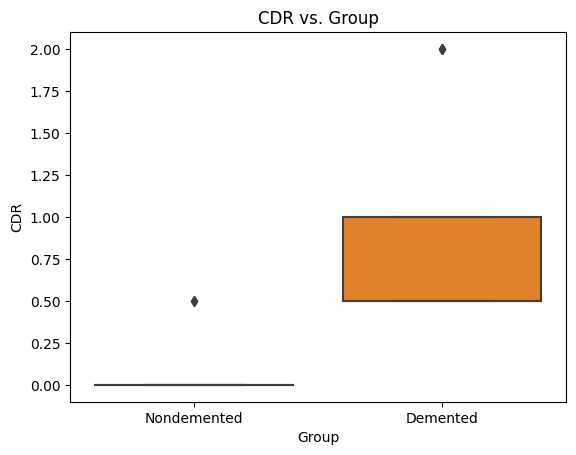

In [ ]:
#path = '/content/drive/MyDrive/למידה חישובית/פרויקט/oasis_longitudinal.csv'
data = pd.read_csv(path)

CDR = data['CDR'].values
Group = data['Group'].values

# Create a dataframe from the variables
df = pd.DataFrame({'CDR': CDR, 'Group': Group})

# Map the CDR status values to their corresponding labels
group_labels = {'Demented': 'Demented', 'Nondemented': 'Nondemented'}
df['Group'] = df['Group'].map(group_labels)

# Create the box plot
sns.boxplot(x='Group', y='CDR', data=df)

plt.title('CDR vs. Group')
plt.savefig("CDR_Group.png", bbox_inches='tight')
files.download("CDR_Group.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

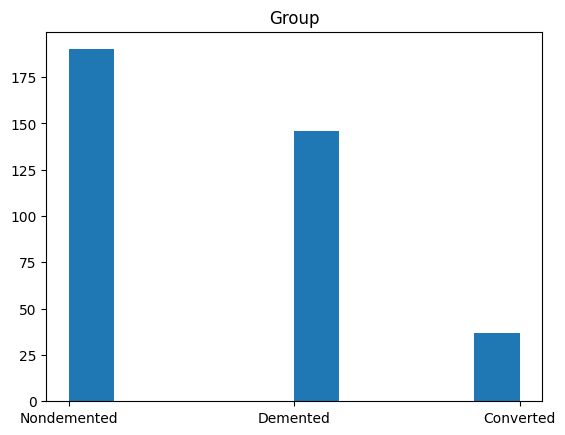

In [ ]:
Group = data['Group'].values

# Create a dataframe from the variables
df = pd.DataFrame({'Group': Group})

# Map the CDR status values to their corresponding labels
group_labels = {'Demented': 'Demented', 'Nondemented': 'Nondemented'}
df['Group'] = df['Group'].map(group_labels)

# Create the box plot
plt.hist(Group)

plt.title('Group')
plt.savefig("Group.png", bbox_inches='tight')
files.download("Group.png")

Text(0.5, 1.0, 'CDR')

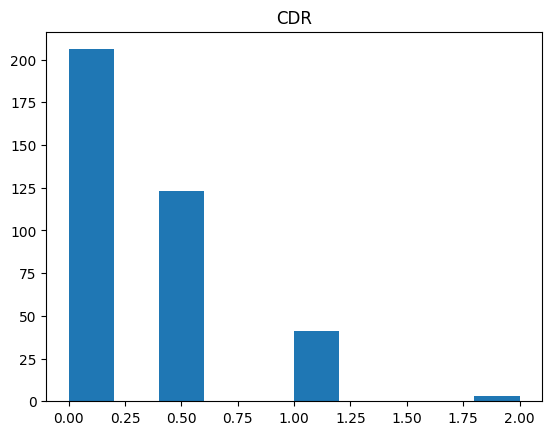

In [ ]:
CDR = data['CDR'].values

# Create a dataframe from the variables
df = pd.DataFrame({'CDR': CDR})

# Map the CDR status values to their corresponding labels
group_labels = {'0.5': '0.5', '0': '0', '1':'1','2':'2'}
df['CDR'] = df['CDR'].map(group_labels)

# Create the box plot
plt.hist(CDR)

plt.title('CDR')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

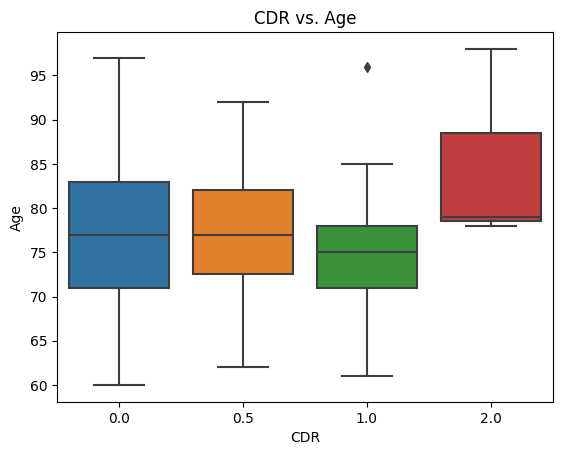

In [ ]:
Age = data['Age'].values

# Create a dataframe from the variables
df = pd.DataFrame({'CDR': CDR, 'Age': Age})

# Create the box plot
sns.boxplot(x='CDR', y='Age', data=df)

plt.title('CDR vs. Age')
plt.savefig("CDR_Age.png", bbox_inches='tight')
files.download("CDR_Age.png")

In [ ]:
#@title Arrange data

## some dummy coding

# 1-demented, 0-not demented, converted-0
data.Group[data.Group=='Nondemented'] = 0
data.Group[data.Group=='Demented'] = 1
data.Group[data.Group=='Converted'] = 0

# CDR
data.CDR[data.CDR==0] = 0
data.CDR[data.CDR==2] = 4
data.CDR[data.CDR==1] = 2
data.CDR[data.CDR==0.5] = 1

# set each patient ID to only digits
data['MRI ID'] = data['MRI ID'].str[-7:]

data['M/F'] = data['M/F'].map({'F': 1, 'M': 0})
data['Hand'] = data['Hand'].map({'R': 1, 'L': 0})

# Calculate the median of each column
column_medians = data.median()
# Replace NaN values with column medians
data = data.fillna(column_medians)

data.to_csv('modified_oasis_longitudinal.csv', index=False)

<ipython-input-6-128506690e28>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Group[data.Group=='Nondemented'] = 0
<ipython-input-6-128506690e28>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Group[data.Group=='Demented'] = 1
<ipython-input-6-128506690e28>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Group[data.Group=='Converted'] = 0
<ipython-input-6-128506690e28>:11: SettingWithCopyWarning: 
A value is trying 

In [ ]:
pip install scikit-learn


(array([227.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 146.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

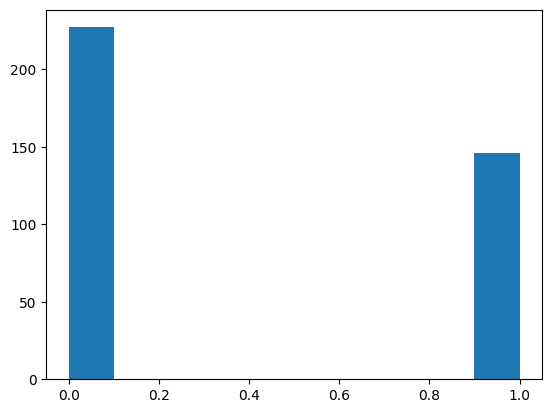

In [ ]:
plt.hist(data['Group'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

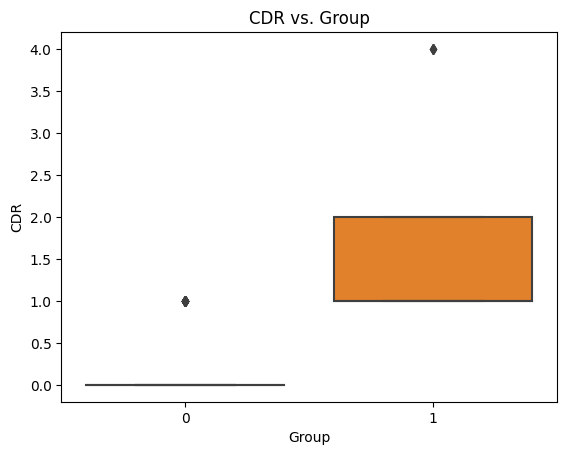

In [ ]:
Group = data['Group'].values

# Create a dataframe from the variables
df = pd.DataFrame({'CDR': CDR, 'Group': Group})

# Create the box plot
sns.boxplot(x='Group', y='CDR', data=df)

plt.title('CDR vs. Group')
plt.savefig("CDR_Group.png", bbox_inches='tight')
files.download("CDR_Group.png")

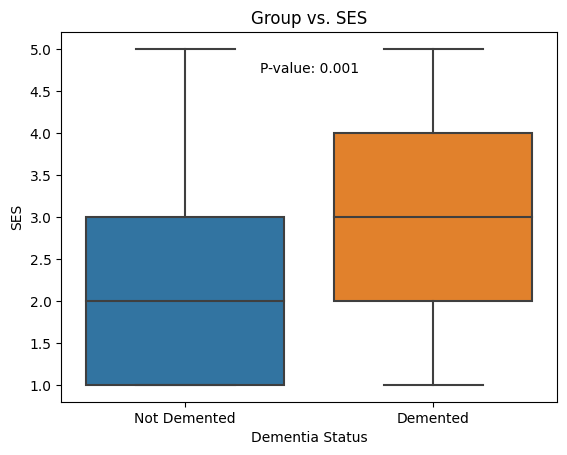

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

SES = data['SES'].values
Group = data['Group'].values

# Create a dataframe from the variables
df = pd.DataFrame({'Group': Group, 'SES': SES})

# Map the dementia status values to their corresponding labels
group_labels = {0: 'Not Demented', 1: 'Demented'}
df['Group'] = df['Group'].map(group_labels)

# Create the box plot
sns.boxplot(x='Group', y='SES', data=df)
plt.xlabel('Dementia Status')
plt.title('Group vs. SES')

# Calculate the p-value using t-test
demented_ses = df[df['Group'] == 'Demented']['SES']
not_demented_ses = df[df['Group'] == 'Not Demented']['SES']
t_statistic, p_value = ttest_ind(demented_ses, not_demented_ses)

# Print the p-value inside the plot
plt.text(0.5, 0.9, f"P-value: {p_value:.3f}", ha='center', va='center', transform=plt.gca().transAxes)

# Save the plot and display it
plt.savefig("Group_SES.png", bbox_inches='tight')
plt.show()


# Find Group


In [41]:
data = pd.read_csv('/content/modified_oasis_longitudinal.csv')

X = data.drop(['Subject ID','MRI ID','Group','Visit', 'M/F','CDR'], axis=1)
y = data.Group

#split the data into test and train and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1)

Cross-Validation Accuracy Scores: [0.89333333 0.76       0.8        0.81081081 0.90540541]
Mean Cross-Validation Accuracy: 0.83390990990991
Standard Deviation of Cross-Validation Accuracy: 0.05619408203660787


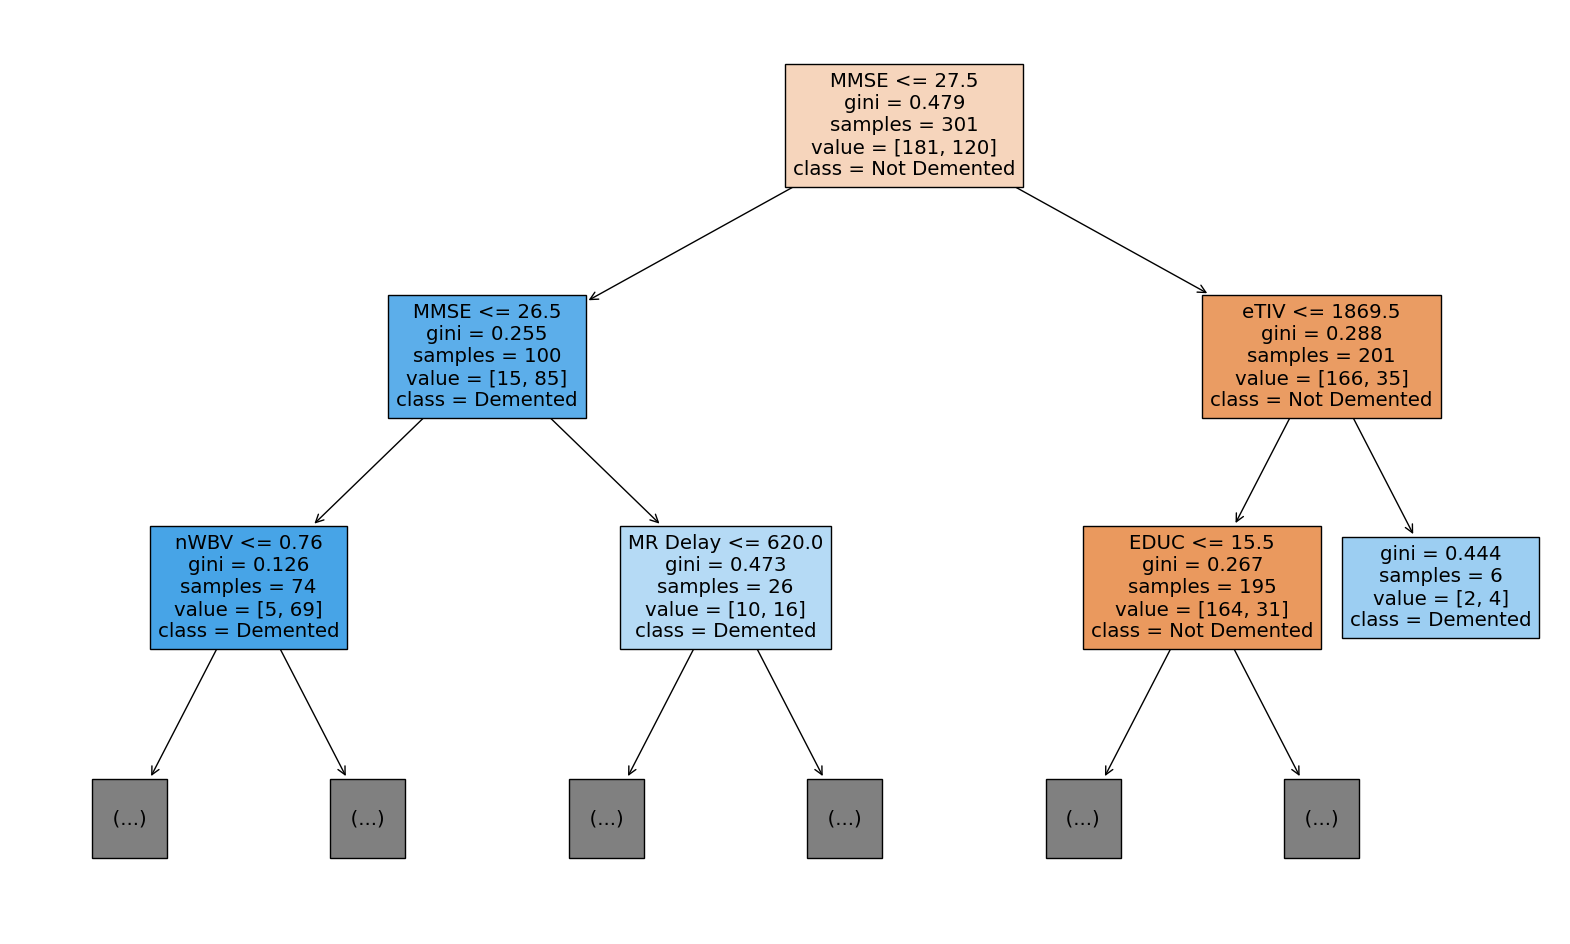

    Feature  Importance
5      MMSE    0.609631
6      eTIV    0.107433
2       Age    0.059448
7      nWBV    0.057713
8       ASF    0.052681
3      EDUC    0.048431
4       SES    0.044809
0  MR Delay    0.019854
1      Hand    0.000000
Accuracy: 0.8947368421052632


In [42]:
#@title Tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
K = 5  # Replace 'K' with the desired number of folds
kf = KFold(n_splits=K, shuffle=True, random_state=42)
# first will run the tree on all the features and find weather demented or not?
# arrange the data into X - features , y - target labels (group)
classfier = tree.DecisionTreeClassifier(min_samples_leaf=2,criterion='gini')
accuracy_scores = cross_val_score(classfier, X, y, cv=kf, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", accuracy_scores)
best_min_samples_leaf = K  # Replace with the best value found during cross-validation
best_criterion = 'gini'   # Replace with the best value found during cross-validation
classfier = tree.DecisionTreeClassifier(min_samples_leaf=best_min_samples_leaf, criterion=best_criterion)
classfier.fit(X_train, y_train)
predicitions = classfier.predict(X_validation)
accuracy_tree_val = accuracy_score(y_validation, predicitions)
print("Mean Cross-Validation Accuracy:", np.mean(accuracy_scores))
print("Standard Deviation of Cross-Validation Accuracy:", np.std(accuracy_scores))
plt.figure(figsize=(20, 12))
plot_tree(classfier, feature_names=X.columns, class_names=["Not Demented", "Demented"], filled=True, max_depth=2)
plt.show()

# feature importance
features_important = classfier.feature_importances_
feature_names = X.columns
features_important = pd.DataFrame({'Feature': feature_names, 'Importance': features_important})
features_important_tree = features_important.sort_values(by='Importance', ascending=False)
print(features_important_tree)

#_______________________________________________________________________________
predicitions = classfier.predict(X_test)
# ROC
y_pred_prob = classfier.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc_tree = auc(fpr_tree, tpr_tree)

#accuarcy
accuracy_tree = accuracy_score(y_test, predicitions)
print("Accuracy:",accuracy_tree)

In [43]:
#@title SVM-linear
# Create and train the SVM model
svm_model = SVC(kernel='linear',C=1)
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_validation)

# Evaluate the model
accuracy_svc_lin_val = accuracy_score(y_validation, y_pred)
print("Accuracy:", accuracy_svc_lin_val)

# Retrieve the feature importances (coefficients)
feature_importance = np.abs(svm_model.coef_)[0]
feature_names = X.columns
sum_importance = np.sum(feature_importance)
normalized_importance = feature_importance / sum_importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': np.round(normalized_importance,3)})
feature_importance_svc_lin = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

#________________________________________________________________________________
y_pred = svm_model.predict(X_test)
# # ROC
# y_pred_prob = svm_model.predict_proba(X_test)[:, 1]
# fpr_svc_lin, tpr_svc_lin, thresholds = roc_curve(y_test, y_pred_prob)
# roc_auc_svc_lin = auc(fpr_svc_lin, tpr_svc_lin)

# Evaluate the model
accuracy_svc_lin = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svc_lin)
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

Accuracy: 0.9411764705882353
    Feature  Importance
0  MR Delay       0.000
1      Hand       0.000
2       Age       0.031
3      EDUC       0.092
4       SES       0.011
5      MMSE       0.430
6      eTIV       0.000
7      nWBV       0.286
8       ASF       0.148
Accuracy: 0.8157894736842105
Precision: 0.8888888888888888
Recall: 0.5714285714285714


In [44]:
#@title SVM-linear with k fold

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
K = 5  # Replace 'K' with the desired number of folds
kf = KFold(n_splits=K, shuffle=True, random_state=42)
accuracy_scores = []
precision_scores = []
recall_scores = []

for train_index, validation_index in kf.split(X):
    X_train, X_validation = X.iloc[train_index], X.iloc[validation_index]
    y_train, y_validation = y.iloc[train_index], y.iloc[validation_index]

    svm_model = SVC(kernel='linear', C=1)
    svm_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = svm_model.predict(X_validation)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_validation, y_pred)
    precision = precision_score(y_validation, y_pred)
    recall = recall_score(y_validation, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

print("Cross-Validation Accuracy Scores:", accuracy_scores)
print("Mean Cross-Validation Accuracy:", np.mean(accuracy_scores))
print("Cross-Validation Precision Scores:", precision_scores)
print("Mean Cross-Validation Precision:", np.mean(precision_scores))
print("Cross-Validation Recall Scores:", recall_scores)
print("Mean Cross-Validation Recall:", np.mean(recall_scores))
# For the final evaluation on the test set:
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X, y)

y_pred_test = svm_model.predict(X_test)
accuracy_svc_lin = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", accuracy_svc_lin)
print(f'Precision: {precision_score(y_test, y_pred_test)}')
print(f'Recall: {recall_score(y_test, y_pred_test)}')
y_pred = svm_model.predict(X_test)
# # ROC
# y_pred_prob = svm_model.predict_proba(X_test)[:, 1]
# fpr_svc_lin, tpr_svc_lin, thresholds = roc_curve(y_test, y_pred_prob)
# roc_auc_svc_lin = auc(fpr_svc_lin, tpr_svc_lin)



Cross-Validation Accuracy Scores: [0.8533333333333334, 0.7733333333333333, 0.8266666666666667, 0.8378378378378378, 0.8648648648648649]
Mean Cross-Validation Accuracy: 0.8312072072072072
Cross-Validation Precision Scores: [0.8387096774193549, 0.6666666666666666, 0.7307692307692307, 0.9285714285714286, 0.9523809523809523]
Mean Cross-Validation Precision: 0.8234195911615266
Cross-Validation Recall Scores: [0.8125, 0.5833333333333334, 0.76, 0.7222222222222222, 0.6896551724137931]
Mean Cross-Validation Recall: 0.7135421455938699
Test Set Accuracy: 0.8421052631578947
Precision: 0.9
Recall: 0.6428571428571429


In [45]:
#@title SVC - Gaussian(rbf)
# Create and train the SVM model
svm_model = SVC(kernel='rbf', probability=True, C=10000)
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_validation)

# Evaluate the model
accuracy_svc_gauss_val = accuracy_score(y_validation, y_pred)
print("Accuracy:", accuracy_svc_gauss_val)


# feature_importance = np.abs(svm_model.coef_)[0]
# feature_names = X.columns
# sum_importance = np.sum(feature_importance)
# normalized_importance = feature_importance / sum_importance
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': np.round(normalized_importance,3)})
# feature_importance_svc_gauss = feature_importance_df.sort_values(by='Importance', ascending=False)
# print(feature_importance_df)

#__________________________________________________________________
y_pred = svm_model.predict(X_test)
# ROC
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]
fpr_svc_gauss, tpr_svc_gauss, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc_svc_gauss = auc(fpr_svc_gauss, tpr_svc_gauss)

# Evaluate the model
accuracy_svc_gauss = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svc_gauss)
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

Accuracy: 0.8918918918918919
Accuracy: 0.868421052631579
Precision: 0.9090909090909091
Recall: 0.7142857142857143


In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from scipy.stats import ttest_rel

K = 5  # Replace 'K' with the desired number of folds
kf = KFold(n_splits=K, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []

# Lists to store permuted metrics for each fold
permuted_accuracy_scores = []
permuted_precision_scores = []
permuted_recall_scores = []

for train_index, validation_index in kf.split(X):
    X_train, X_validation = X.iloc[train_index], X.iloc[validation_index]
    y_train, y_validation = y.iloc[train_index], y.iloc[validation_index]

    svm_model = SVC(kernel='rbf', probability=True, C=10000)
    svm_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = svm_model.predict(X_validation)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_validation, y_pred)
    precision = precision_score(y_validation, y_pred)
    recall = recall_score(y_validation, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

    # Permutation testing for each fold
    permuted_accuracy = []
    permuted_precision = []
    permuted_recall = []
    num_permutations = 1000  # Number of permutations (you can adjust this as needed)

    for _ in range(num_permutations):
        np.random.shuffle(y_pred)  # Permute predicted labels
        permuted_accuracy.append(accuracy_score(y_validation, y_pred))
        permuted_precision.append(precision_score(y_validation, y_pred))
        permuted_recall.append(recall_score(y_validation, y_pred))

    permuted_accuracy_scores.append(permuted_accuracy)
    permuted_precision_scores.append(permuted_precision)
    permuted_recall_scores.append(permuted_recall)

# Calculate p-values for each metric based on t-tests
p_value_accuracy = ttest_rel(accuracy_scores, np.mean(permuted_accuracy_scores, axis=1)).pvalue
p_value_precision = ttest_rel(precision_scores, np.mean(permuted_precision_scores, axis=1)).pvalue
p_value_recall = ttest_rel(recall_scores, np.mean(permuted_recall_scores, axis=1)).pvalue

print("Cross-Validation Accuracy Scores:", accuracy_scores)
print("Mean Cross-Validation Accuracy:", np.mean(accuracy_scores))
print("Accuracy p-value:", p_value_accuracy)

print("Cross-Validation Precision Scores:", precision_scores)
print("Mean Cross-Validation Precision:", np.mean(precision_scores))
print("Precision p-value:", p_value_precision)

print("Cross-Validation Recall Scores:", recall_scores)
print("Mean Cross-Validation Recall:", np.mean(recall_scores))
print("Recall p-value:", p_value_recall)

# For the final evaluation on the test set:
# ... (rest of the code remains the same)
# For the final evaluation on the test set:
svm_model = SVC(kernel='rbf', probability=True, C=10000)
svm_model.fit(X, y)

y_pred_test = svm_model.predict(X_test)
y_pred_prob_test = svm_model.predict_proba(X_test)[:, 1]

fpr_svc_gauss, tpr_svc_gauss, thresholds = roc_curve(y_test, y_pred_prob_test)
roc_auc_svc_gauss = auc(fpr_svc_gauss, tpr_svc_gauss)

accuracy_svc_gauss = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", accuracy_svc_gauss)
print(f'Precision: {precision_score(y_test, y_pred_test)}')
print(f'Recall: {recall_score(y_test, y_pred_test)}')



Cross-Validation Accuracy Scores: [0.8133333333333334, 0.76, 0.84, 0.7702702702702703, 0.8918918918918919]
Mean Cross-Validation Accuracy: 0.8150990990990991
Accuracy p-value: 0.0008079298978886288
Cross-Validation Precision Scores: [0.875, 0.6666666666666666, 0.8095238095238095, 0.9523809523809523, 1.0]
Mean Cross-Validation Precision: 0.8607142857142858
Precision p-value: 0.0003830030826666307
Cross-Validation Recall Scores: [0.65625, 0.5, 0.68, 0.5555555555555556, 0.7241379310344828]
Mean Cross-Validation Recall: 0.6231886973180077
Recall p-value: 0.0006730145844835558
Test Set Accuracy: 0.868421052631579
Precision: 1.0
Recall: 0.6428571428571429


In [47]:
#@title Logistic Reg
# Create and train the logistic regression model
logreg_model = LogisticRegression(C=10000, max_iter=1000000)
logreg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg_model.predict(X_validation)

# Evaluate the model
accuracy_logistic_val = accuracy_score(y_validation, y_pred)
print("Accuracy:", accuracy_logistic_val)

# feature importance
feature_importance = np.abs(logreg_model.coef_[0])
feature_importance /= np.sum(feature_importance)
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_log = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

#_______________________________________________________________________________
# ROC
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc_log = auc(fpr_log, tpr_log)

# Make predictions on the testing set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_logistic)

Accuracy: 0.8783783783783784
    Feature  Importance
0  MR Delay    0.000032
1      Hand    0.232972
2       Age    0.002331
3      EDUC    0.009507
4       SES    0.006073
5      MMSE    0.057233
6      eTIV    0.000465
7      nWBV    0.146651
8       ASF    0.544735
Accuracy: 0.8421052631578947


In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.stats import ttest_rel

K = 5  # Replace 'K' with the desired number of folds
kf = KFold(n_splits=K, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []

# Lists to store permuted metrics for each fold
permuted_accuracy_scores = []
permuted_precision_scores = []
permuted_recall_scores = []

for train_index, validation_index in kf.split(X):
    X_train, X_validation = X.iloc[train_index], X.iloc[validation_index]
    y_train, y_validation = y.iloc[train_index], y.iloc[validation_index]

    logreg_model = LogisticRegression(C=10000, max_iter=1000000)
    logreg_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = logreg_model.predict(X_validation)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_validation, y_pred)
    precision = precision_score(y_validation, y_pred)
    recall = recall_score(y_validation, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

    # Permutation testing for each fold
    permuted_accuracy = []
    permuted_precision = []
    permuted_recall = []
    num_permutations = 1000  # Number of permutations (you can adjust this as needed)

    for _ in range(num_permutations):
        np.random.shuffle(y_pred)  # Permute predicted labels
        permuted_accuracy.append(accuracy_score(y_validation, y_pred))
        permuted_precision.append(precision_score(y_validation, y_pred))
        permuted_recall.append(recall_score(y_validation, y_pred))

    permuted_accuracy_scores.append(permuted_accuracy)
    permuted_precision_scores.append(permuted_precision)
    permuted_recall_scores.append(permuted_recall)

# Calculate p-values for each metric based on t-tests
p_value_accuracy = ttest_rel(accuracy_scores, np.mean(permuted_accuracy_scores, axis=1)).pvalue
p_value_precision = ttest_rel(precision_scores, np.mean(permuted_precision_scores, axis=1)).pvalue
p_value_recall = ttest_rel(recall_scores, np.mean(permuted_recall_scores, axis=1)).pvalue

print("Cross-Validation Accuracy Scores:", accuracy_scores)
print("Mean Cross-Validation Accuracy:", np.mean(accuracy_scores))
print("Standard Deviation of Cross-Validation Accuracy:", np.std(accuracy_scores))
print("Accuracy p-value:", p_value_accuracy)

print("Cross-Validation Precision Scores:", precision_scores)
print("Mean Cross-Validation Precision:", np.mean(precision_scores))
print("Standard Deviation of Cross-Validation Precision:", np.std(precision_scores))
print("Precision p-value:", p_value_precision)

print("Cross-Validation Recall Scores:", recall_scores)
print("Mean Cross-Validation Recall:", np.mean(recall_scores))
print("Standard Deviation of Cross-Validation Recall:", np.std(recall_scores))
print("Recall p-value:", p_value_recall)

# For the final evaluation on the test set:
# ... (rest of the code remains the same)


# For the final evaluation on the test set:
logreg_model = LogisticRegression(C=10000, max_iter=1000000)
logreg_model.fit(X, y)

y_pred_prob_test = logreg_model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, thresholds = roc_curve(y_test, y_pred_prob_test)
roc_auc_log = auc(fpr_log, tpr_log)

y_pred_test = logreg_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", accuracy_logistic)


Cross-Validation Accuracy Scores: [0.8266666666666667, 0.7733333333333333, 0.8533333333333334, 0.8108108108108109, 0.8783783783783784]
Mean Cross-Validation Accuracy: 0.8285045045045045
Standard Deviation of Cross-Validation Accuracy: 0.03595601927088559
Accuracy p-value: 0.0003082346028114817
Cross-Validation Precision Scores: [0.8064516129032258, 0.6666666666666666, 0.7916666666666666, 0.9583333333333334, 0.9545454545454546]
Mean Cross-Validation Precision: 0.8355327468230694
Standard Deviation of Cross-Validation Precision: 0.1100270030605389
Precision p-value: 0.0003010530669144742
Cross-Validation Recall Scores: [0.78125, 0.5833333333333334, 0.76, 0.6388888888888888, 0.7241379310344828]
Mean Cross-Validation Recall: 0.697522030651341
Standard Deviation of Cross-Validation Recall: 0.07496556485014523
Recall p-value: 0.00018752346855843932
Test Set Accuracy: 0.8421052631578947


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

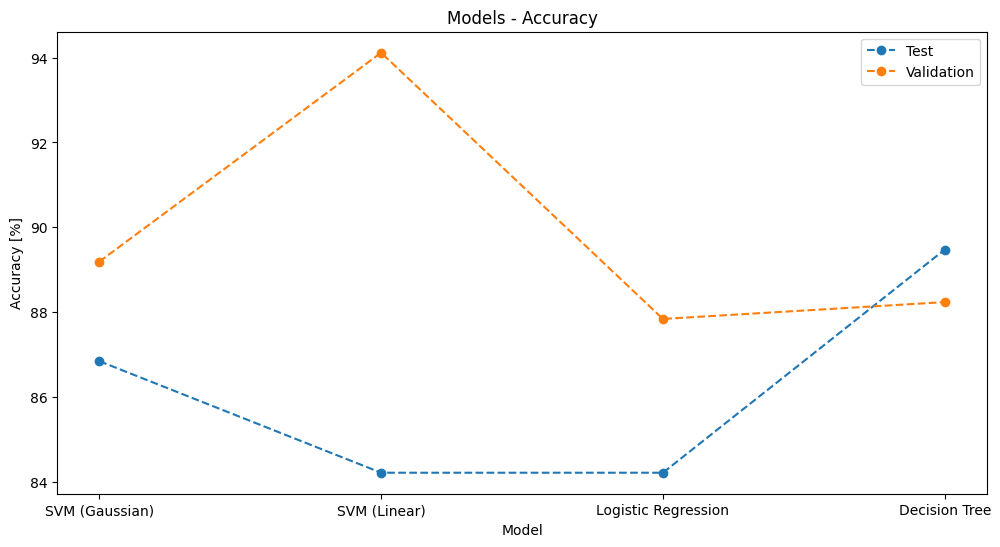

In [49]:
#@title Conclusions
#ROC
plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.plot(fpr_log, tpr_log, label=f'ROC log-reg, AUC={np.round(roc_auc_log,2)}')
# plt.plot(fpr_tree, tpr_tree, label=f'ROC tree, AUC={np.round(roc_auc_tree,2)}')
# plt.plot(fpr_svc_lin, tpr_svc_lin, label=f'ROC svc-linear, AUC={np.round(roc_auc_svc_lin,2)}')
# plt.plot(fpr_svc_gauss, tpr_svc_gauss, label=f'ROC svc-gauss, AUC={np.round(roc_auc_svc_gauss,2)}')
# plt.title('Models - ROC curves')
# plt.xlabel('FPR - 1-Specifity')
# plt.ylabel('TPR - Sensitivity')
# plt.legend()


# accuarcies
# plt.subplot(1, 2, 2)
accuracies_test = np.dot([accuracy_svc_gauss, accuracy_svc_lin, accuracy_logistic, accuracy_tree],100)
accuracies_validation = np.dot([accuracy_svc_gauss_val, accuracy_svc_lin_val, accuracy_logistic_val, accuracy_tree_val],100)
model_names = ['SVM (Gaussian)', 'SVM (Linear)', 'Logistic Regression', 'Decision Tree']
plt.plot(range(len(accuracies_test)),accuracies_test, marker='o',linestyle='--', label='Test')
plt.plot(range(len(accuracies_validation)),accuracies_validation, marker='o',linestyle='--', label='Validation')
plt.xticks(range(len(accuracies_validation)),model_names)
plt.xlabel('Model')
plt.ylabel('Accuracy [%]')
plt.title('Models - Accuracy')
plt.legend()
plt.savefig("Conclusion_Group.png", bbox_inches='tight')
files.download("Conclusion_Group.png")

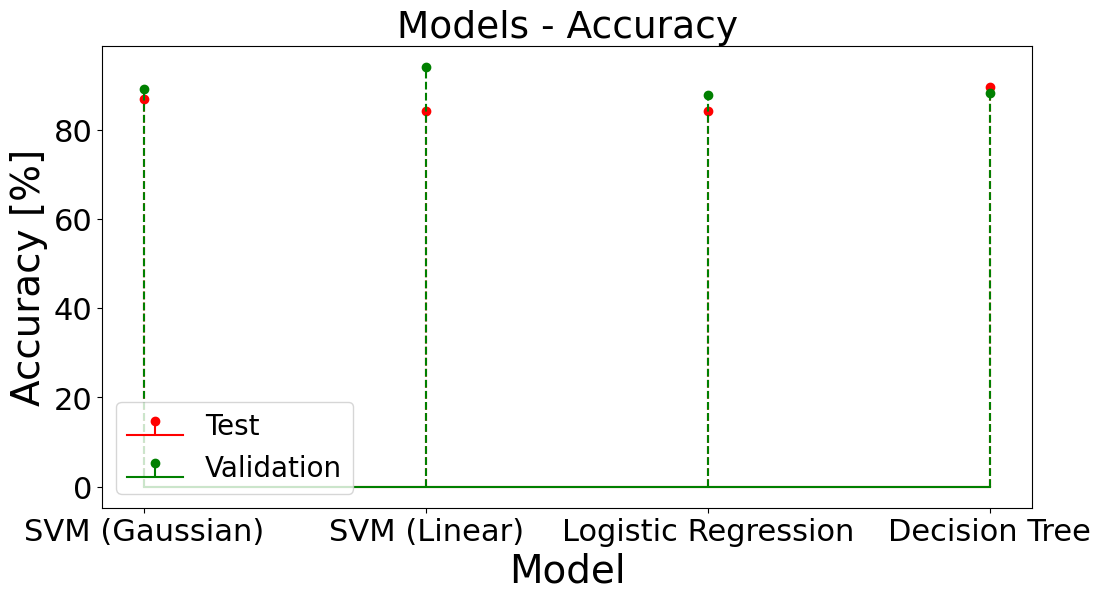

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Data for accuracies
accuracies_test = np.dot([accuracy_svc_gauss, accuracy_svc_lin, accuracy_logistic, accuracy_tree], 100)
accuracies_validation = np.dot([accuracy_svc_gauss_val, accuracy_svc_lin_val, accuracy_logistic_val, accuracy_tree_val], 100)
model_names = ['SVM (Gaussian)', 'SVM (Linear)', 'Logistic Regression', 'Decision Tree']

# Stem plot for accuracies
plt.figure(figsize=(12, 6))
plt.stem(range(len(accuracies_test)), accuracies_test, markerfmt='ro', linefmt='r--', basefmt='r-', label='Test')
plt.stem(range(len(accuracies_validation)), accuracies_validation, markerfmt='go', linefmt='g--', basefmt='g-', label='Validation')
plt.xticks(range(len(accuracies_validation)), model_names, fontsize=12)  # Increase font size for x-axis labels
plt.xlabel('Model', fontsize=28)  # Increase font size for x-axis label
plt.ylabel('Accuracy [%]', fontsize=28)  # Increase font size for y-axis label
plt.title('Models - Accuracy', fontsize=27)  # Increase font size for title
plt.legend(loc='lower left', fontsize=20)  # Increase font size for legend

# Increase font size for y-axis tick labels
plt.yticks(fontsize=22)
# Increase font size for x-axis tick labels
plt.xticks(fontsize=22)

# Save and display the plot
plt.savefig("Conclusion_Group.png", bbox_inches='tight')
plt.show()  # Display the plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

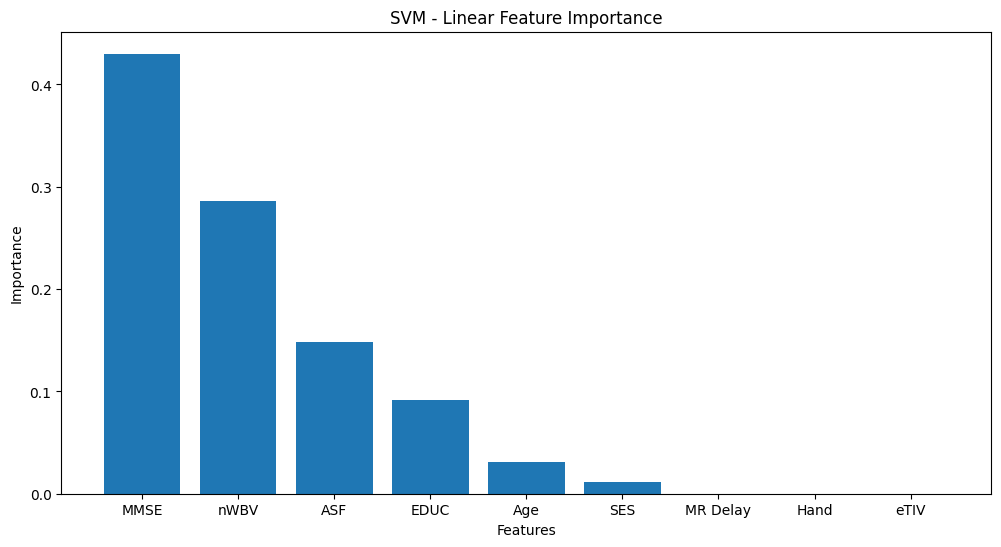

In [51]:
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_svc_lin.Feature, feature_importance_svc_lin.Importance)
plt.title('SVM - Linear Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.savefig("Conclusion_Group_Importance.png", bbox_inches='tight')
files.download("Conclusion_Group_Importance.png")



In [52]:
#@title Knn
X = data[['MMSE']]
y = data.Group

# Create a KMeans object with the desired number of clusters
knn = KNeighborsClassifier(n_neighbors=25)

# Fit the K-means model to data
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy_knn)


# ROC
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc_knn = auc(fpr_knn, tpr_knn)

knn_model = KNeighborsClassifier()

# Train the KNN model
knn_model.fit(X_train, y_train)

# Evaluate the model's accuracy on the testing set
accuracy_all_features = knn_model.score(X_test, y_test)


feature_names = X.columns
feature_accuracies = []

for feature in feature_names:
    # Remove the feature from the data
    X_train_subset = X_train.drop(columns=[feature])
    X_test_subset = X_test.drop(columns=[feature])

    # Train the KNN model with the feature removed
    knn_model_subset = KNeighborsClassifier()
    knn_model_subset.fit(X_train_subset, y_train)

    # Evaluate the model's accuracy on the testing set
    accuracy_subset = knn_model_subset.score(X_test_subset, y_test)

    # Store the accuracy for the current feature subset
    feature_accuracies.append(accuracy_subset)

# Calculate the importance scores based on accuracy differences
importance_scores = accuracy_all_features - np.array(feature_accuracies)

# Create a DataFrame to store feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_df)

Accuracy: 0.6842105263157895
  Feature  Importance
0    MMSE         0.0


# Find CDR


In [66]:
data = pd.read_csv('/content/modified_oasis_longitudinal.csv')

X = data.drop(['Subject ID','MRI ID','Visit','CDR','Group','MR Delay', 'M/F'], axis=1)
y = data.CDR

#split the data into test and train and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1)

Accuracy: 0.6764705882352942


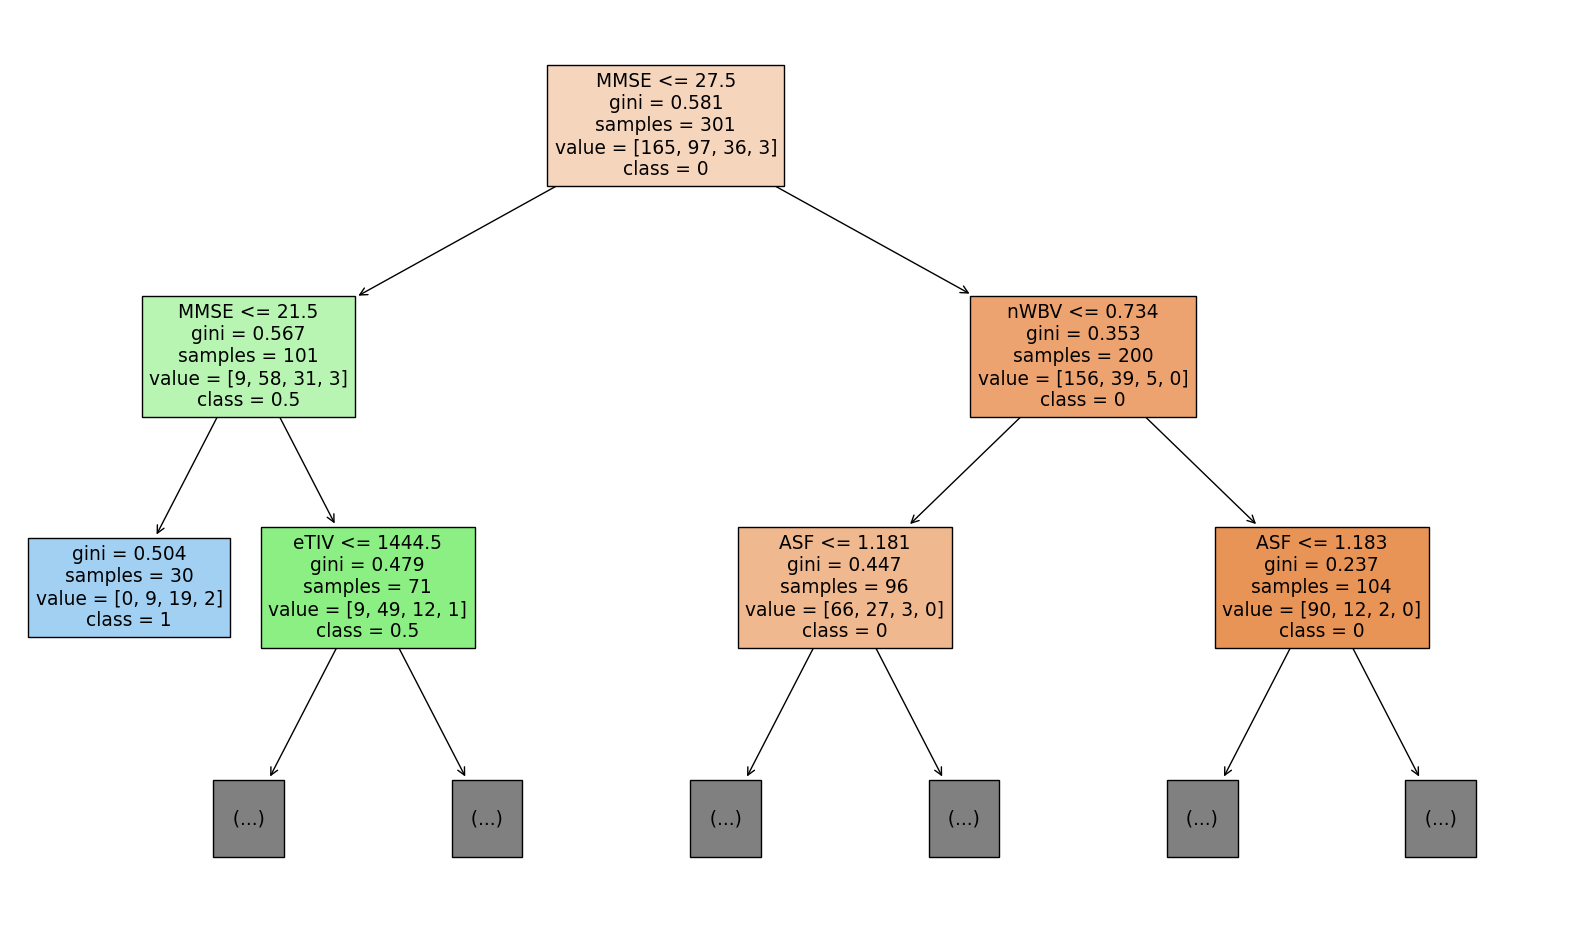

  Feature  Importance
4    MMSE    0.769019
6    nWBV    0.107133
7     ASF    0.052829
5    eTIV    0.048034
2    EDUC    0.022984
0    Hand    0.000000
1     Age    0.000000
3     SES    0.000000
Accuracy: 0.7894736842105263


In [67]:
#@title Tree

# first will run the tree on all the features and find weather demented or not?
# arrange the data into X - features , y - target labels (group)
classfier = tree.DecisionTreeClassifier(min_samples_leaf=18,criterion='gini')
classfier.fit(X_train, y_train)

predicitions = classfier.predict(X_validation)
accuracy_tree_val = accuracy_score(y_validation, predicitions)
print("Accuracy:",accuracy_tree_val)


plt.figure(figsize=(20, 12))
plot_tree(classfier, feature_names=X.columns, class_names=["0", "0.5",'1','2'], filled=True, max_depth=2)
plt.show()

# feature importance
features_important = classfier.feature_importances_
feature_names = X.columns
features_important = pd.DataFrame({'Feature': feature_names, 'Importance': features_important})
features_important_tree = features_important.sort_values(by='Importance', ascending=False)
print(features_important_tree)

#_______________________________________________________________________________
predicitions = classfier.predict(X_test)

#accuarcy
accuracy_tree = accuracy_score(y_test, predicitions)
print("Accuracy:",accuracy_tree)

Cross-Validation Accuracy Scores: [0.7066666666666667, 0.7066666666666667, 0.76, 0.7432432432432432, 0.7027027027027027]
Mean Cross-Validation Accuracy: 0.7238558558558559
Standard Deviation of Cross-Validation Accuracy: 0.023326646925374957
Test Set Accuracy: 0.8157894736842105


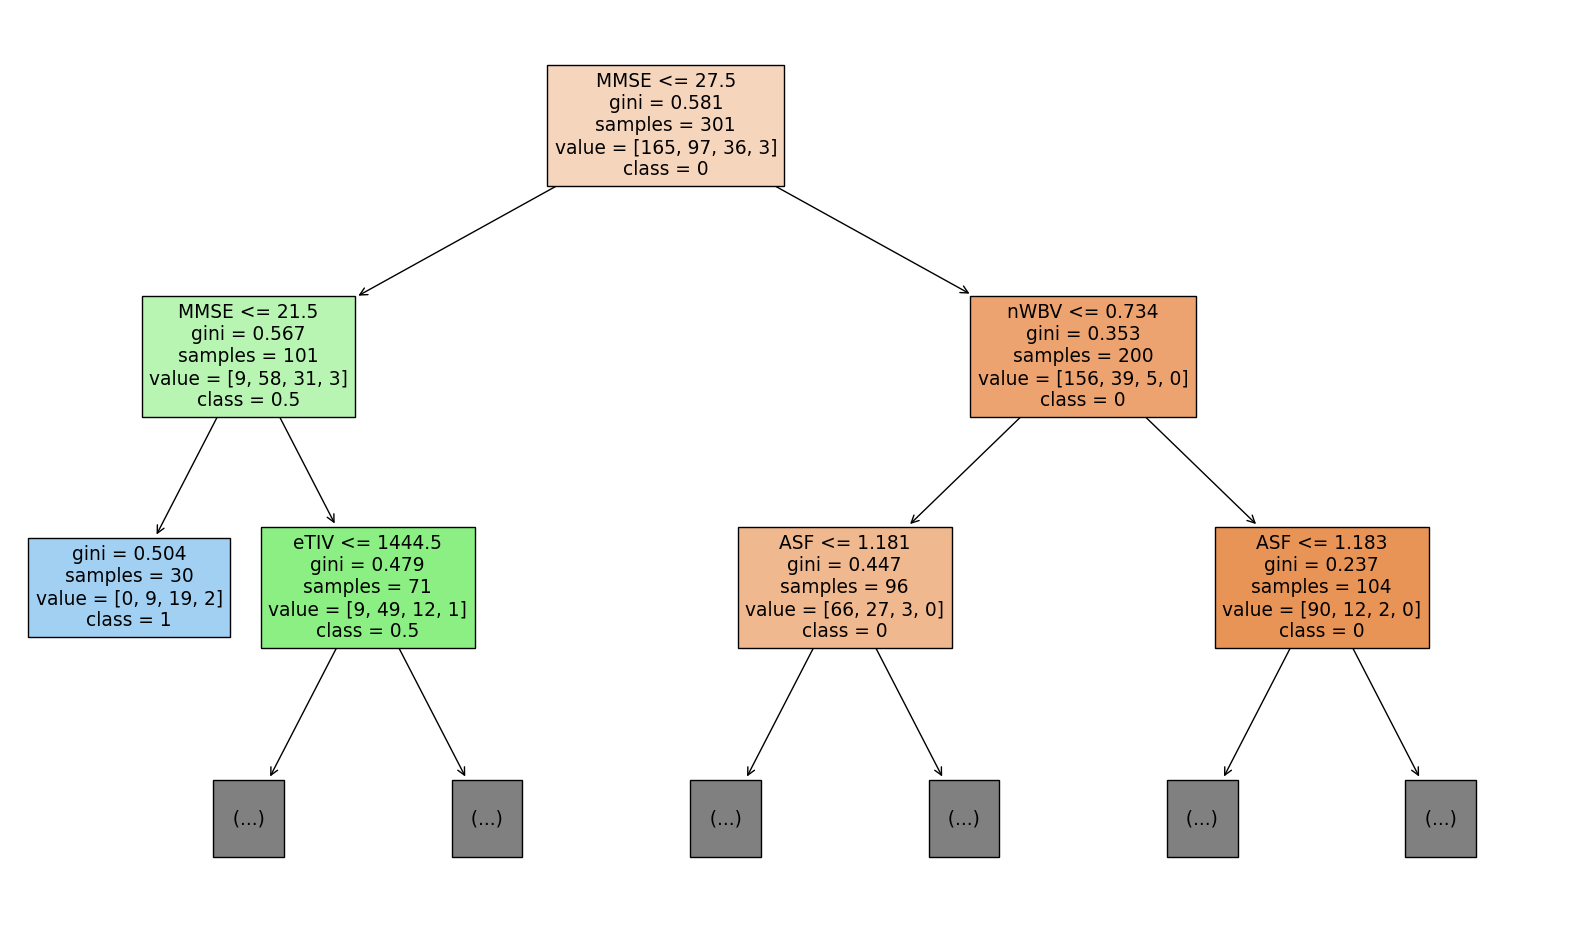

Accuracy: 0.7894736842105263


In [68]:
#@title Tree with k fold
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
K = 5  # Replace 'K' with the desired number of folds
kf = KFold(n_splits=K, shuffle=True, random_state=42)
accuracy_scores = []

for train_index, validation_index in kf.split(X):
    X_train, X_validation = X.iloc[train_index], X.iloc[validation_index]
    y_train, y_validation = y.iloc[train_index], y.iloc[validation_index]

    classifier = DecisionTreeClassifier(min_samples_leaf=18, criterion='gini')
    classifier.fit(X_train, y_train)

    # Make predictions on the validation set
    predictions = classifier.predict(X_validation)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_validation, predictions)
    accuracy_scores.append(accuracy)

print("Cross-Validation Accuracy Scores:", accuracy_scores)
print("Mean Cross-Validation Accuracy:", np.mean(accuracy_scores))
print("Standard Deviation of Cross-Validation Accuracy:", np.std(accuracy_scores))
# For the final evaluation on the test set:
classifier = DecisionTreeClassifier(min_samples_leaf=18, criterion='gini')
classifier.fit(X, y)

predictions_test = classifier.predict(X_test)
accuracy_tree = accuracy_score(y_test, predictions_test)
print("Test Set Accuracy:", accuracy_tree)
plt.figure(figsize=(20, 12))
plot_tree(classfier, feature_names=X.columns, class_names=["0", "0.5",'1','2'], filled=True, max_depth=2)
plt.show()


#accuarcy
accuracy_tree = accuracy_score(y_test, predicitions)
print("Accuracy:",accuracy_tree)


In [65]:
#@title SVC-linear
# Create and train the SVM model
svm_model_lin = SVC(kernel='linear',C=0.1, probability=True)
svm_model_lin.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model_lin.predict(X_validation)

# Evaluate the model
accuracy_svc_lin_val = accuracy_score(y_validation, y_pred)
print("Accuracy:", accuracy_svc_lin_val)

# Retrieve the feature importances (coefficients)
feature_importance = np.abs(svm_model_lin.coef_)[0]
feature_names = X.columns
sum_importance = np.sum(feature_importance)
normalized_importance = feature_importance / sum_importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': np.round(normalized_importance,3)})
feature_importance_svc_lin = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

#________________________________________________________________________________
y_pred = svm_model.predict(X_test)


# Evaluate the model
accuracy_svc_lin = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svc_lin)
print('Precision:',precision_score(y_test, y_pred, average='weighted'))
print('Recall:',recall_score(y_test, y_pred, average='weighted'))


Accuracy: 0.7432432432432432
  Feature  Importance
0    Hand       0.000
1     Age       0.011
2    EDUC       0.088
3     SES       0.167
4    MMSE       0.604
5    eTIV       0.000
6    nWBV       0.094
7     ASF       0.035


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold
from scipy.stats import ttest_rel

# Assuming X_train, y_train, X_validation, y_validation, X_test, y_test are already defined

# SVC-linear with k-fold cross-validation
# Create and train the SVM model
svm_model_lin = SVC(kernel='linear', C=0.1, probability=True)

# Combine training and validation data for k-fold cross-validation
X_train_validation = pd.concat([X_train, X_validation], axis=0)
y_train_validation = pd.concat([y_train, y_validation], axis=0)

# Define the number of folds for k-fold cross-validation
num_folds = 5

# Initialize the k-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []

# Lists to store permuted metrics for each fold
permuted_precision_scores = []
permuted_recall_scores = []

# Perform k-fold cross-validation
for train_index, validation_index in kf.split(X_train_validation):
    X_train_fold, X_validation_fold = X_train_validation.iloc[train_index], X_train_validation.iloc[validation_index]
    y_train_fold, y_validation_fold = y_train_validation.iloc[train_index], y_train_validation.iloc[validation_index]

    # Fit the model on the training fold
    svm_model_lin.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    y_pred_fold = svm_model_lin.predict(X_validation_fold)

    # Evaluate the model on the validation fold
    accuracy_fold = accuracy_score(y_validation_fold, y_pred_fold)
    precision_fold = precision_score(y_validation_fold, y_pred_fold, average='weighted')
    recall_fold = recall_score(y_validation_fold, y_pred_fold, average='weighted')

    # Append the evaluation metrics to the lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)

    # Permutation testing for each fold
    permuted_precision = []
    permuted_recall = []
    num_permutations = 1000  # Number of permutations (you can adjust this as needed)

    for _ in range(num_permutations):
        np.random.shuffle(y_pred_fold)  # Permute predicted labels
        permuted_precision.append(precision_score(y_validation_fold, y_pred_fold, average='weighted'))
        permuted_recall.append(recall_score(y_validation_fold, y_pred_fold, average='weighted'))

    permuted_precision_scores.append(permuted_precision)
    permuted_recall_scores.append(permuted_recall)

# Calculate the average performance metrics across all folds
avg_accuracy_svc_lin_val = np.mean(accuracy_scores)
avg_precision_svc_lin_val = np.mean(precision_scores)
avg_recall_svc_lin_val = np.mean(recall_scores)

# Calculate p-values for precision and recall based on t-tests
p_value_precision = ttest_rel(precision_scores, np.mean(permuted_precision_scores, axis=1)).pvalue
p_value_recall = ttest_rel(recall_scores, np.mean(permuted_recall_scores, axis=1)).pvalue

print("Average Accuracy:", avg_accuracy_svc_lin_val)
print("Average Precision:", avg_precision_svc_lin_val)
print("Average Recall:", avg_recall_svc_lin_val)
print("Precision p-value:", p_value_precision)
print("Recall p-value:", p_value_recall)

#________________________________________________________________________________

# Fit the model on the entire training set (including validation set)
svm_model_lin.fit(X_train_validation, y_train_validation)

# Make predictions on the test set
y_pred_test = svm_model_lin.predict(X_test)

# Evaluate the model on the test set
accuracy_svc_lin = accuracy_score(y_test, y_pred_test)
precision_svc_lin = precision_score(y_test, y_pred_test, average='weighted')
recall_svc_lin = recall_score(y_test, y_pred_test, average='weighted')

print("Test Accuracy:", accuracy_svc_lin)
print("Test Precision:", precision_svc_lin)
print("Test Recall:", recall_svc_lin)


In [ ]:
#@title SVC - Gaussian(rbf)
# Create and train the SVM model
svm_model = SVC(kernel='rbf', probability=True, C=100000)
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_validation)

# Evaluate the model
accuracy_svc_gauss_val = accuracy_score(y_validation, y_pred)
print("Accuracy:", accuracy_svc_gauss_val)

#__________________________________________________________________
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy_svc_gauss = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svc_gauss)

In [74]:
#@title SVC - Gaussian(rbf) with k fold
#@title Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

# Assuming X_train, y_train, X_validation, y_validation, X_test, y_test are already defined

#@title SVC-Gaussian(rbf) with k-fold cross-validation
# Create and train the SVM model
svm_model = SVC(kernel='rbf', probability=True, C=100000)

# Combine training and validation data for k-fold cross-validation
X_train_validation = pd.concat([X_train, X_validation], axis=0)
y_train_validation = pd.concat([y_train, y_validation], axis=0)

# Define the number of folds for k-fold cross-validation
num_folds = 5

# Initialize the k-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize a list to store evaluation metrics for each fold
accuracy_scores = []

# Perform k-fold cross-validation
for train_index, validation_index in kf.split(X_train_validation):
    X_train_fold, X_validation_fold = X_train_validation.iloc[train_index], X_train_validation.iloc[validation_index]
    y_train_fold, y_validation_fold = y_train_validation.iloc[train_index], y_train_validation.iloc[validation_index]

    # Fit the model on the training fold
    svm_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    y_pred_fold = svm_model.predict(X_validation_fold)

    # Evaluate the model on the validation fold
    accuracy_fold = accuracy_score(y_validation_fold, y_pred_fold)

    # Append the evaluation metric to the list
    accuracy_scores.append(accuracy_fold)

# Calculate the average accuracy across all folds
accuracy_svc_gauss_val = np.mean(accuracy_scores)

print("Average Accuracy:", accuracy_svc_gauss_val)

#__________________________________________________________________

# Fit the model on the entire training set (including validation set)
svm_model.fit(X_train_validation, y_train_validation)

# Make predictions on the test set
y_pred_test = svm_model.predict(X_test)

# Evaluate the model on the test set
accuracy_svc_gauss = accuracy_score(y_test, y_pred_test)

print("Test Accuracy:", accuracy_svc_gauss)



Average Accuracy: 0.724
Test Accuracy: 0.7631578947368421


In [ ]:
#@title SVC - polynomial
# Create and train the SVM model
svm_model = SVC(kernel='poly', probability=True, C=10000, degree=3)
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_validation)

# Evaluate the model
accuracy_svc_pol_val = accuracy_score(y_validation, y_pred)
print("Accuracy:", accuracy_svc_gauss_val)

#__________________________________________________________________
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy_svc_pol= accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svc_gauss)

In [71]:
#@title SVC - polynomial with k fold
#@title Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

# Assuming X_train, y_train, X_validation, y_validation, X_test, y_test are already defined

#@title SVC - Polynomial with k-fold cross-validation
# Create and train the SVM model
svm_model = SVC(kernel='poly', probability=True, C=10000, degree=3)

# Combine training and validation data for k-fold cross-validation
X_train_validation = pd.concat([X_train, X_validation], axis=0)
y_train_validation = pd.concat([y_train, y_validation], axis=0)

# Define the number of folds for k-fold cross-validation
num_folds = 10

# Initialize the k-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize a list to store evaluation metrics for each fold
accuracy_scores = []

# Perform k-fold cross-validation
for train_index, validation_index in kf.split(X_train_validation):
    X_train_fold, X_validation_fold = X_train_validation.iloc[train_index], X_train_validation.iloc[validation_index]
    y_train_fold, y_validation_fold = y_train_validation.iloc[train_index], y_train_validation.iloc[validation_index]

    # Fit the model on the training fold
    svm_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    y_pred_fold = svm_model.predict(X_validation_fold)

    # Evaluate the model on the validation fold
    accuracy_fold = accuracy_score(y_validation_fold, y_pred_fold)

    # Append the evaluation metric to the list
    accuracy_scores.append(accuracy_fold)

# Calculate the average accuracy across all folds
avg_accuracy_svc_pol_val = np.mean(accuracy_scores)

print("Average Accuracy:", avg_accuracy_svc_pol_val)

#__________________________________________________________________

# Fit the model on the entire training set (including validation set)
svm_model.fit(X_train_validation, y_train_validation)

# Make predictions on the test set
y_pred_test = svm_model.predict(X_test)

# Evaluate the model on the test set
accuracy_svc_pol = accuracy_score(y_test, y_pred_test)

print("Test Accuracy:", accuracy_svc_pol)



Average Accuracy: 0.6968705547652917
Test Accuracy: 0.7631578947368421


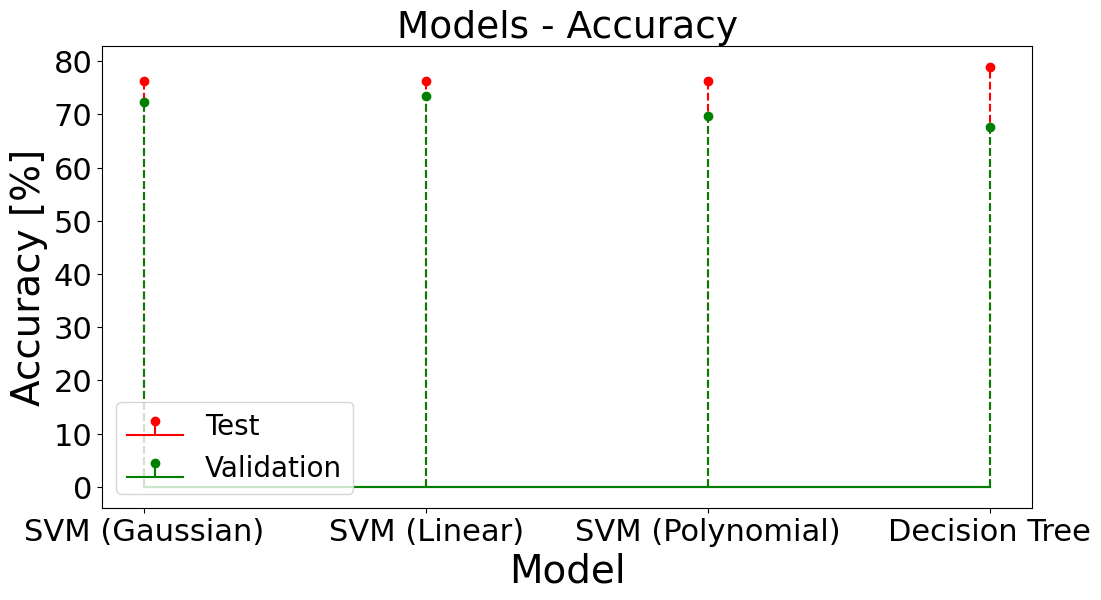

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Data for accuracies
accuracies_test = np.dot([accuracy_svc_gauss, accuracy_svc_lin, accuracy_svc_pol, accuracy_tree], 100)
accuracies_validation = np.dot([accuracy_svc_gauss_val, accuracy_svc_lin_val, accuracy_svc_pol_val, accuracy_tree_val], 100)
model_names = ['SVM (Gaussian)', 'SVM (Linear)', 'SVM (Polynomial)', 'Decision Tree']

# Stem plot for accuracies
plt.figure(figsize=(12, 6))
plt.stem(range(len(accuracies_test)), accuracies_test, markerfmt='ro', linefmt='r--', basefmt='r-', label='Test')
plt.stem(range(len(accuracies_validation)), accuracies_validation, markerfmt='go', linefmt='g--', basefmt='g-', label='Validation')
plt.xticks(range(len(accuracies_validation)), model_names, fontsize=22)  # Increase font size for x-axis labels
plt.xlabel('Model', fontsize=28)  # Increase font size for x-axis label
plt.ylabel('Accuracy [%]', fontsize=28)  # Increase font size for y-axis label
plt.title('Models - Accuracy', fontsize=27)  # Increase font size for title
plt.legend(loc='lower left', fontsize=20)  # Increase font size for legend

# Increase font size for y-axis tick labels
plt.yticks(fontsize=22)
# Increase font size for x-axis tick labels
plt.xticks(fontsize=22)

# Save and display the plot
plt.savefig("Conclusion_CDR.png", bbox_inches='tight')
plt.show()  # Display the plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

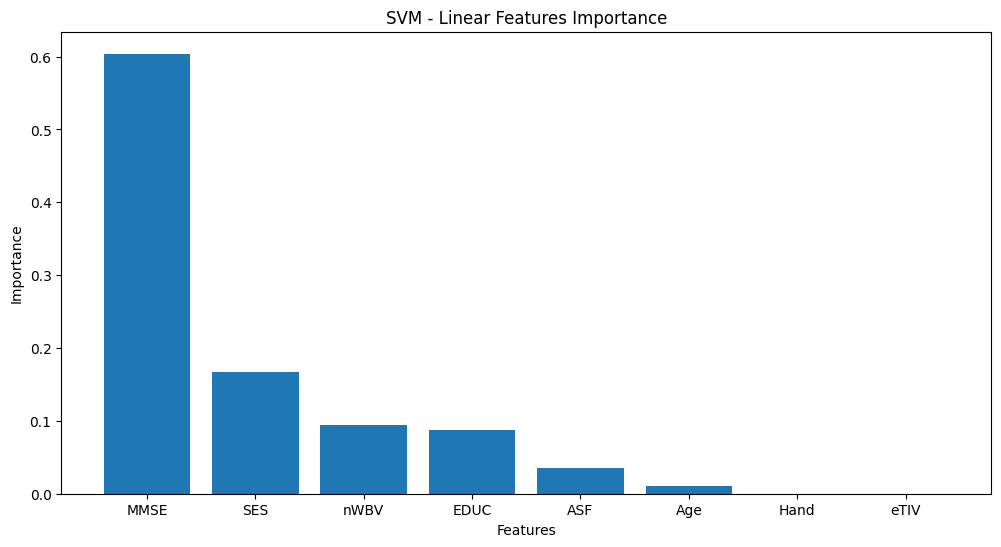

In [80]:
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_svc_lin.Feature, feature_importance_svc_lin.Importance)
plt.title('SVM - Linear Features Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.savefig("Conclusion_CDR_Importance.png", bbox_inches='tight')
files.download("Conclusion_CDR_Importance.png")

In [ ]:
#@title Logistic Reg
# # Create and train the logistic regression model
# logreg_model = LogisticRegression(C=0.01, max_iter=1000000)
# logreg_model.fit(X_train, y_train)

# # Make predictions on the testing set
# y_pred = logreg_model.predict(X_validation)

# # Evaluate the model
# accuracy_logistic_val = accuracy_score(y_validation, y_pred)
# print("Accuracy:", accuracy_logistic_val)

# # feature importance
# feature_importance = np.abs(logreg_model.coef_[0])
# feature_importance /= np.sum(feature_importance)
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
# feature_importance_log = feature_importance_df.sort_values(by='Importance', ascending=False)
# print(feature_importance_df)

# #_______________________________________________________________________________
# # Make predictions on the testing set
# y_pred = logreg_model.predict(X_test)

# # Evaluate the model
# accuracy_logistic = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy_logistic)

# Generalizing

Accuracy: 0.6481481481481481
Precision: 0.7116127207062823
Recall: 0.6481481481481481


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

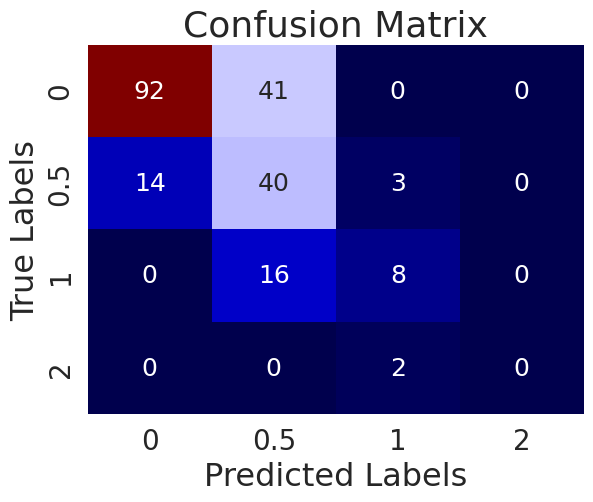

In [92]:
#@title Generalizing
data = pd.read_csv('/content/drive/MyDrive/למידה חישובית/פרויקט/oasis_cross-sectional.csv')
data['M/F'] = data['M/F'].map({'F': 1, 'M': 0})
data['Hand'] = data['Hand'].map({'R': 1, 'L': 0})
data = data.drop('ID', axis=1)
data = data.drop('Delay', axis=1)
data['CDR'] = data['CDR']*2
# # Calculate the median of each column
# column_medians = data.median()
# # Replace NaN values with column medians
# data = data.fillna(column_medians)

data = data.rename(columns={'Educ': 'EDUC'})

# Preprocess the data

has_nan = data.isna().any(axis=1)  # Check if any NaN values exist in each row
data = data.dropna()  # Drop the rows containing NaN values

#determing features:
y_test = data['CDR'].values;
data_no_CDR = data.drop(['CDR','M/F'], axis=1)
X_test = data_no_CDR

y_pred_svm = svm_model_lin.predict(X_test)
# y_pred_tree = classfier.predict(X_test)

# Evaluate the model
accuracy_svc_lin = accuracy_score(y_test, y_pred_svm)
# accuracy_tree = accuracy_score(y_test, y_pred_tree)

print("Accuracy:", accuracy_svc_lin)
print('Precision:',precision_score(y_test, y_pred_svm, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_svm, average='weighted'))


confusion_mat = confusion_matrix(y_test, y_pred_svm)
sns.set(font_scale=1.5)
sns.heatmap(confusion_mat, annot=True, cmap="seismic", fmt="d", cbar=False)
plt.xticks([0.5, 1.5, 2.5, 3.5], labels=["0", "0.5", "1", "2"], fontsize=20)
plt.yticks([0.5, 1.5, 2.5, 3.5], labels=["0", "0.5", "1", "2"], fontsize=20)

plt.title("Confusion Matrix", fontsize=26)
plt.xlabel("Predicted Labels", fontsize=23)
plt.ylabel("True Labels", fontsize=23)
plt.savefig("Conclusion_Generalize.png", bbox_inches='tight')
files.download("Conclusion_Generalize.png")

# ROC for multidimensional

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert the labels to binary format
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))

# Compute predicted probabilities for each class
y_pred_prob = svm_model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binary.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate the TPR values at the common FPR thresholds
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
mean_auc = auc(all_fpr, mean_tpr)





In [ ]:
#@ roc tree
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))

# Compute predicted probabilities for each class
y_pred_prob_tree = classfier.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr_tree = dict()
tpr_tree = dict()
roc_auc_tree = dict()
n_classes_tree = y_test_binary.shape[1]

for i in range(n_classes_tree):
    fpr_tree[i], tpr_tree[i], _ = roc_curve(y_test_binary[:, i], y_pred_prob_tree[:, i])
    roc_auc_tree[i] = auc(fpr_tree[i], tpr_tree[i])

# Compute macro-average ROC curve and AUC
all_fpr_tree = np.unique(np.concatenate([fpr_tree[i] for i in range(n_classes_tree)]))

# Interpolate the TPR values at the common FPR thresholds
mean_tpr_tree = np.zeros_like(all_fpr_tree)
for i in range(n_classes_tree):
    mean_tpr_tree += np.interp(all_fpr_tree, fpr_tree[i], tpr_tree[i])

mean_tpr_tree /= n_classes_tree
mean_auc_tree = auc(all_fpr_tree, mean_tpr_tree)

In [ ]:
#@ logistic regression tree logreg_model.classfier
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))

# Compute predicted probabilities for each class
y_pred_prob_log = logreg_model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr_log = dict()
tpr_log = dict()
roc_auc_log = dict()
n_classes_log = y_test_binary.shape[1]

for i in range(n_classes_log):
    fpr_log[i], tpr_log[i], _ = roc_curve(y_test_binary[:, i], y_pred_prob_log[:, i])
    roc_auc_log[i] = auc(fpr_log[i], tpr_log[i])

# Compute macro-average ROC curve and AUC
all_fpr_log = np.unique(np.concatenate([fpr_log[i] for i in range(n_classes_log)]))

# Interpolate the TPR values at the common FPR thresholds
mean_tpr_log = np.zeros_like(all_fpr_log)
for i in range(n_classes_log):
    mean_tpr_log += np.interp(all_fpr_log, fpr_log[i], tpr_log[i])

mean_tpr_log /= n_classes_log
mean_auc_log = auc(all_fpr_log, mean_tpr_log)

In [ ]:
#@
# Convert the labels to binary format
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))

# Compute predicted probabilities for each class
y_pred_prob = svm_model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binary.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate the TPR values at the common FPR thresholds
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
mean_auc = auc(all_fpr, mean_tpr)





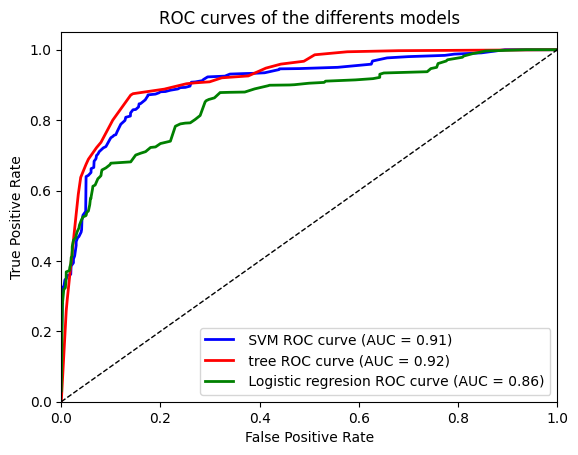

In [ ]:
#@ plot ROC
# Plot the average ROC curve
plt.figure()
plt.plot(all_fpr, mean_tpr, color='blue', lw=2, label=' SVM ROC curve (AUC = {:.2f})'.format(mean_auc))
plt.plot(all_fpr_tree, mean_tpr_tree, color='red', lw=2, label=' tree ROC curve (AUC = {:.2f})'.format(mean_auc_tree))
plt.plot(all_fpr_log, mean_tpr_log, color='green', lw=2, label=' Logistic regresion ROC curve (AUC = {:.2f})'.format(mean_auc_log))

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of the differents models')
plt.legend(loc="lower right")
plt.show()

# Find CDR-spare

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/למידה חישובית/פרויקט/modified_oasis_longitudinal.csv')

# arrange the data into X - features , y - target labels (group)
X = data.drop(['Subject ID','MRI ID','Visit','CDR'], axis=1)
y = data.CDR

#split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [ ]:
#@title Tree
classfier = tree.DecisionTreeClassifier(min_samples_leaf=20,criterion='gini')
classfier.fit(X_train, y_train)

predicitions = classfier.predict(X_test)
accuracy = accuracy_score(y_test, predicitions)
print("Accuracy:",accuracy)

plt.figure(figsize=(30, 12))
plot_tree(classfier, feature_names=X.columns, class_names=['0','1','2','4'], filled=True)
plt.show()

features_important = classfier.feature_importances_
feature_names = X.columns
features_important = pd.DataFrame({'Feature': feature_names, 'Importance': features_important})
features_important_tree = features_important.sort_values(by='Importance', ascending=False)
print(features_important)

# Predict probabilities for the positive class
y_pred_prob = classfier.predict_proba(X_test)[:, 1]

# Compute the false positive rate (fpr), true positive rate (tpr)
fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the area under the ROC curve (AUC)
roc_auc_tree = auc(fpr_tree, tpr_tree)

ValueError: ignored

In [ ]:
#@title Knn
X = data[['Group', 'MMSE']]
y = data.CDR

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

# Create a KMeans object with the desired number of clusters
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the K-means model to data
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy_knn)

# Predict probabilities for the positive class
y_pred_prob = knn.predict_proba(X_test)[:, 1]

# Compute the false positive rate (fpr), true positive rate (tpr)
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the area under the ROC curve (AUC)
roc_auc_knn = auc(fpr_knn, tpr_knn)